### ESMA 4016
### Clustering III. Validacion de clusters 
### Edgar Acuna 

In [74]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score,adjusted_rand_score,fowlkes_mallows_score
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

###  I.  Clustering  validation  para  Diabetes usando kmeans y la silhouette

In [75]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [76]:
y=data['class']
X=data.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X= scaler.transform(X)
dist2=pairwise_distances(X)
Z = hierarchy.linkage(X,'ward')

('For n_clusters =', 2, 'The average silhouette_score is :', 0.19214441257334328)


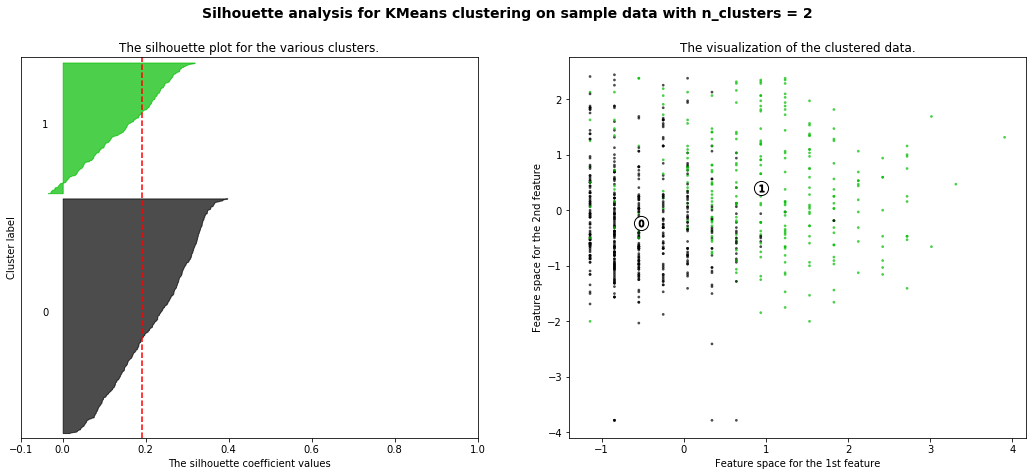

('For n_clusters =', 3, 'The average silhouette_score is :', 0.18126280880876336)


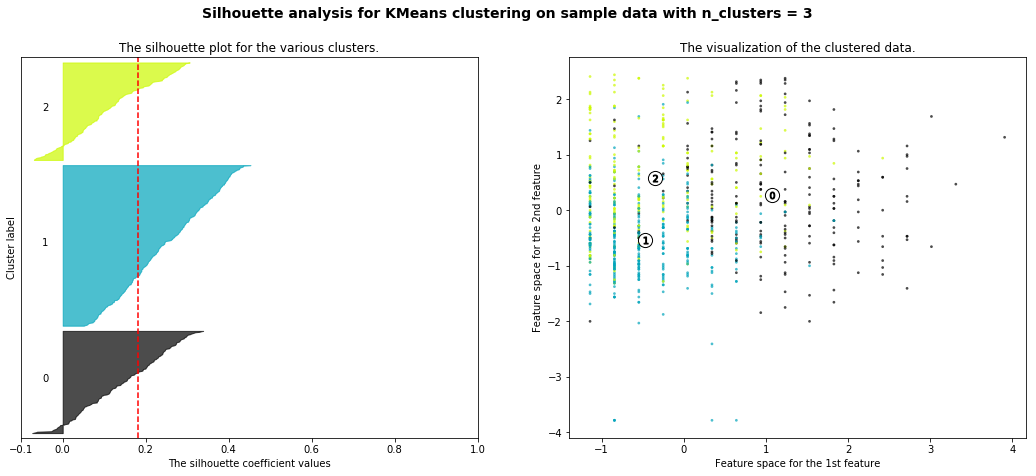

('For n_clusters =', 4, 'The average silhouette_score is :', 0.20174890536020607)


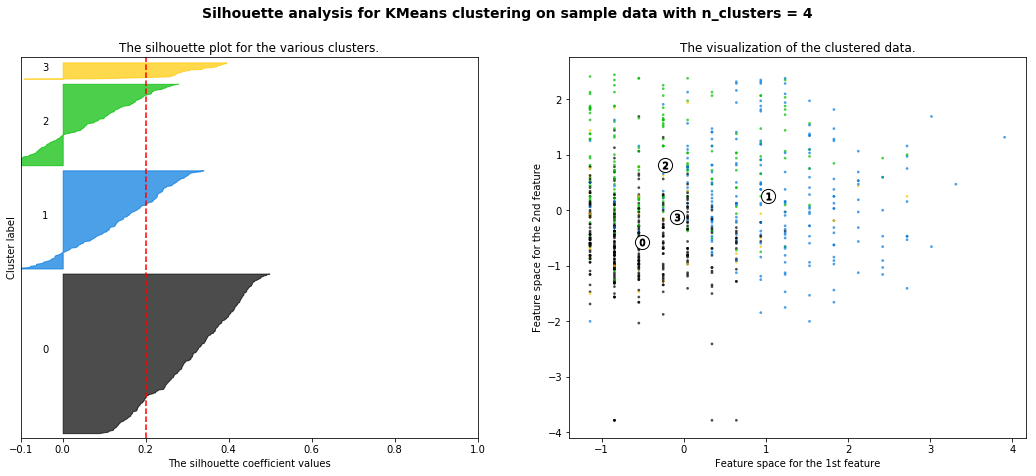

('For n_clusters =', 5, 'The average silhouette_score is :', 0.18849553070282199)


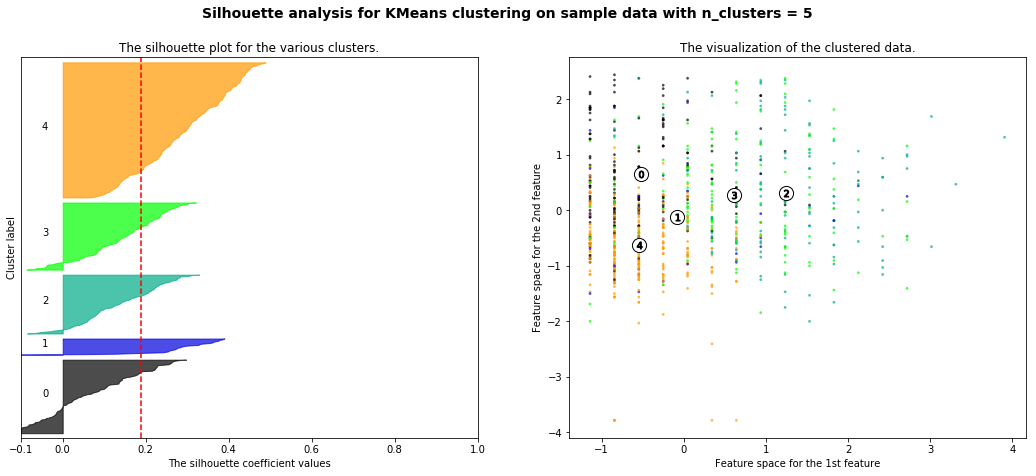

('For n_clusters =', 6, 'The average silhouette_score is :', 0.16913445400402236)


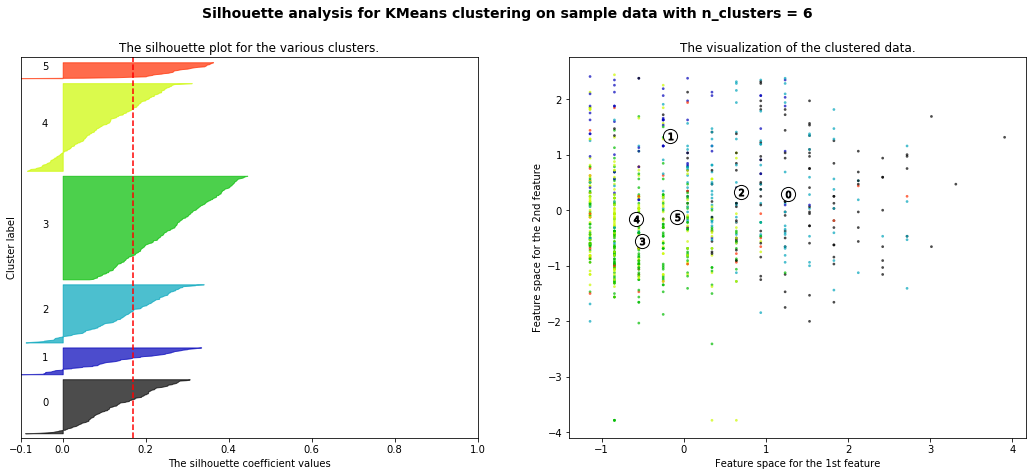

In [77]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### La silhouette recomienda 4 clusters

### II. Clustering validation para Diabetes usando kmeans y el indice de Calinski

In [78]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    calinski= calinski_harabaz_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "El Index de calinski es :", calinski)

('For n_clusters =', 2, 'El Index de calinski es :', 151.6064834978886)
('For n_clusters =', 3, 'El Index de calinski es :', 156.52436356053067)
('For n_clusters =', 4, 'El Index de calinski es :', 144.59106682948209)
('For n_clusters =', 5, 'El Index de calinski es :', 132.48069571292524)
('For n_clusters =', 6, 'El Index de calinski es :', 126.08164528150522)


### El indice de Calisnski-Harabaz recomineda 3 clusters

### III. Clustering validation para iabetes usando kmeans y el indice de Rand

In [79]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    rand=adjusted_rand_score(y, cluster_labels) 
    print("For n_clusters =", n_clusters,
          "El Index de Rand es :", rand)

('For n_clusters =', 2, 'El Index de Rand es :', 0.11246867387192581)
('For n_clusters =', 3, 'El Index de Rand es :', 0.1297994504932542)
('For n_clusters =', 4, 'El Index de Rand es :', 0.16012517593694922)
('For n_clusters =', 5, 'El Index de Rand es :', 0.12844351684028751)
('For n_clusters =', 6, 'El Index de Rand es :', 0.08491691775331188)


### El indice Rand recomienda 4 clusters

### IV Clustering validation para Diabetes usando kmeans y el indice de Fowlkes-Mallows

In [80]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    fm=fowlkes_mallows_score(y, cluster_labels) 
    print("For n_clusters =", n_clusters,
          "El Index de Fowlkes-Mallows es :", fm)

('For n_clusters =', 2, 'El Index de Fowlkes-Mallows es :', 0.59382656687229773)
('For n_clusters =', 3, 'El Index de Fowlkes-Mallows es :', 0.51376011927062182)
('For n_clusters =', 4, 'El Index de Fowlkes-Mallows es :', 0.52170338483359091)
('For n_clusters =', 5, 'El Index de Fowlkes-Mallows es :', 0.46412511975392179)
('For n_clusters =', 6, 'El Index de Fowlkes-Mallows es :', 0.40601065773521355)


### El indice de Fowlkes-Mallows recomienda 2 clusters

### V Clustering validation para Diabetes usando jererquico aglomerativo  y la silhouette

('For n_clusters =', 2, 'The average silhouette_score is :', 0.15675483450688257)


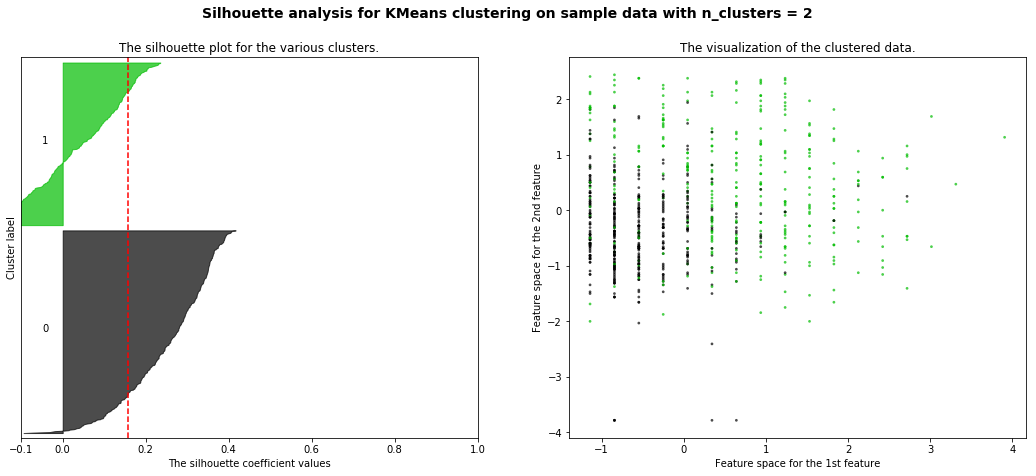

('For n_clusters =', 3, 'The average silhouette_score is :', 0.17063308093837828)


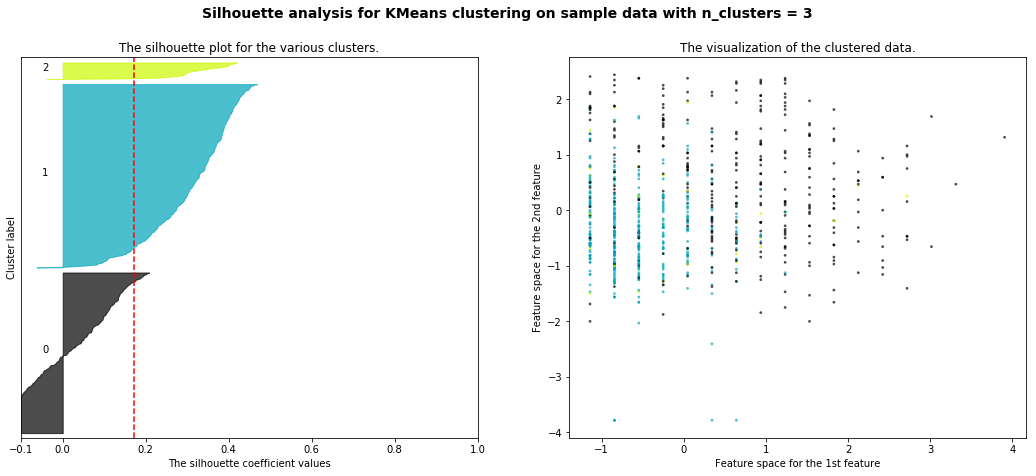

('For n_clusters =', 4, 'The average silhouette_score is :', 0.16948676498930015)


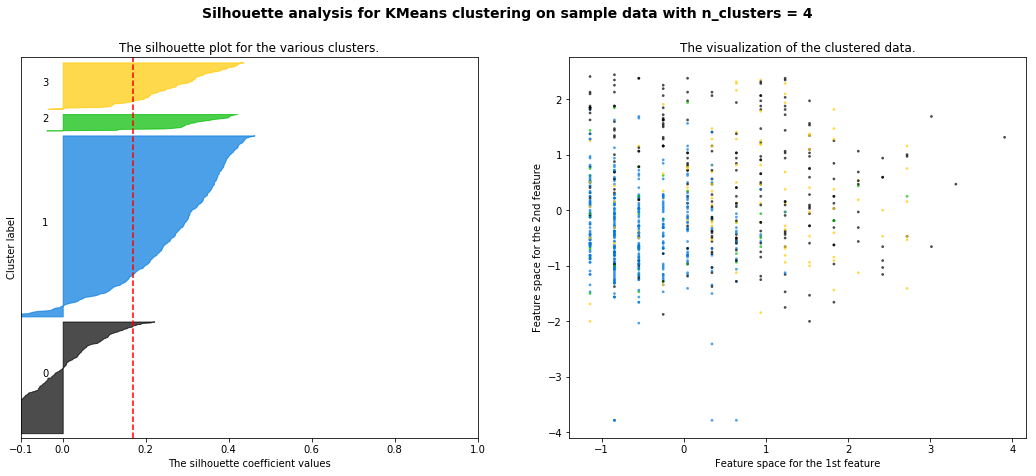

('For n_clusters =', 5, 'The average silhouette_score is :', 0.1778255031626664)


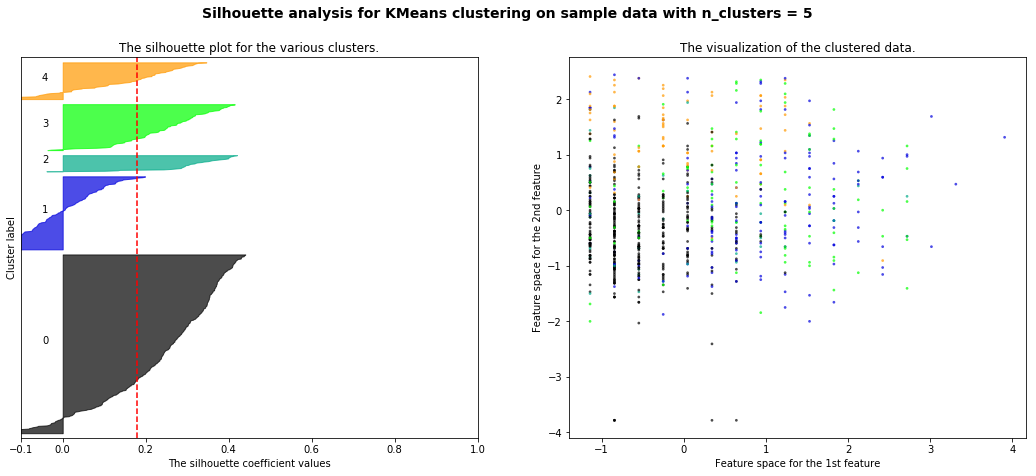

('For n_clusters =', 6, 'The average silhouette_score is :', 0.13454144342315852)


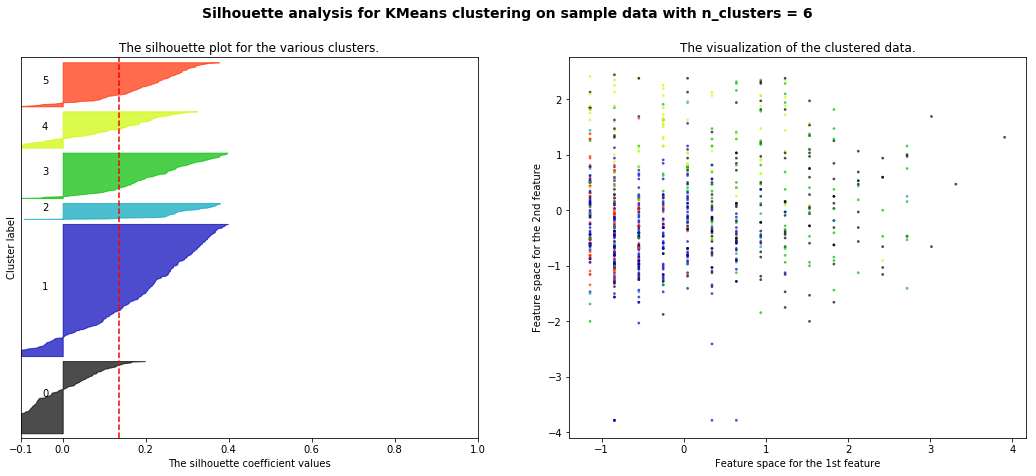

In [81]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward")
    clusterer.fit(X)
    cluster_labels=clusterer.fit_predict(X) 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### La silhouette recomienda 5 clusters

### VI. Clustering validation para Diabetes usando jerarquico aglomerativo y el indice de Calinski

In [82]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward")
    clusterer.fit(X)
    cluster_labels=clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    calinski= calinski_harabaz_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "El Index de calinski es :", calinski)

('For n_clusters =', 2, 'El Index de calinski es :', 117.82564091325128)
('For n_clusters =', 3, 'El Index de calinski es :', 105.59289626873363)
('For n_clusters =', 4, 'El Index de calinski es :', 105.92388273364388)
('For n_clusters =', 5, 'El Index de calinski es :', 102.16705884624845)
('For n_clusters =', 6, 'El Index de calinski es :', 101.62996377238593)


### El indice de Calinski recomienda 2 clusters

### VII. Clustering validation para Diabetes usando jerarquico aglomerativo  y el indice de Rand

In [83]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward")
    clusterer.fit(X)
    cluster_labels=clusterer.fit_predict(X)
    rand=adjusted_rand_score(y, cluster_labels) 
    print("For n_clusters =", n_clusters,
          "El Index de Rand es :", rand)

('For n_clusters =', 2, 'El Index de Rand es :', 0.10224418306057363)
('For n_clusters =', 3, 'El Index de Rand es :', 0.10353324962454367)
('For n_clusters =', 4, 'El Index de Rand es :', 0.1188766400810264)
('For n_clusters =', 5, 'El Index de Rand es :', 0.12598411945481228)
('For n_clusters =', 6, 'El Index de Rand es :', 0.08977924028011558)


### El indice de Rand recomienda 5 clusters

### VIII. Cluster validation para Diabetes usando Jerarquico Aglomerativo y el indice de Fowlkes-Mallows

In [84]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward")
    clusterer.fit(X)
    cluster_labels=clusterer.fit_predict(X)
    fm=fowlkes_mallows_score(y, cluster_labels) 
    print("For n_clusters =", n_clusters,
          "El Indice de Fowlkes-Mallows  es :", fm)

('For n_clusters =', 2, 'El Indice de Fowlkes-Mallows  es :', 0.57346927437449546)
('For n_clusters =', 3, 'El Indice de Fowlkes-Mallows  es :', 0.5516639748070945)
('For n_clusters =', 4, 'El Indice de Fowlkes-Mallows  es :', 0.51932192440918568)
('For n_clusters =', 5, 'El Indice de Fowlkes-Mallows  es :', 0.50116437454380136)
('For n_clusters =', 6, 'El Indice de Fowlkes-Mallows  es :', 0.42290084140522094)


### El indice de Fowlkes-Mallows recomienda dos clusters